# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#7b6b59;overflow:hidden">TRAIN MODEL SVC</div>

Conda env: `artofproblemsolving`

In [1]:
# Import library needed
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

from utils.util import save_pkl
from utils.util import create_folder
from utils.utils_for_classification import load_text_dataset_from_directory
from utils.utils_for_classification import classification_evaluation


Load & prepare dataset

In [2]:
X_train, y_train = load_text_dataset_from_directory(r"..\data\classification\train")
X_test, y_test = load_text_dataset_from_directory(r"..\data\classification\test")
entire_X = X_train + X_test

# Preprocess text data (Representation text to numeric)
vectorizer = TfidfVectorizer(lowercase=False)
text_features = vectorizer.fit_transform(entire_X)

vectorized_X_train, vectorized_X_test = text_features[:len(X_train)], text_features[len(X_train):]

Found 4 labels in "..\data\classification\train"
 - Label "Algebra" 693 files
 - Label "Combinatorics" 632 files
 - Label "Geometry" 787 files
 - Label "Number Theory" 695 files
Total 2807 files

Found 4 labels in "..\data\classification\test"
 - Label "Algebra" 174 files
 - Label "Combinatorics" 158 files
 - Label "Geometry" 197 files
 - Label "Number Theory" 174 files
Total 703 files



Train

In [3]:
model = SVC(kernel='linear', C=1.0, probability=True)
model.fit(vectorized_X_train, y_train)

y_pred = model.predict(vectorized_X_test)


Overall model accuracy:
Accuracy  = 88.05%
Precision = 88.22%
Recall    = 88.05%
F1-score  = 88.10%

Model accuracy for each label:
Algebra       = 85.06%
Combinatorics = 87.34%
Geometry      = 94.92%
Number Theory = 83.91%


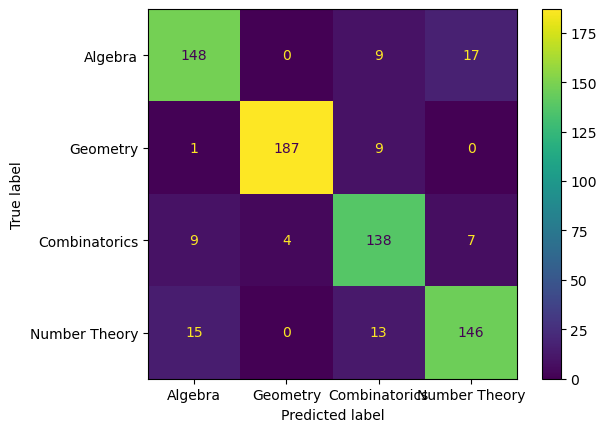

In [4]:
# Evaluate model performance
classification_evaluation(y_test, y_pred)


Save model

In [5]:
# Save model
directory = "saved_models/classification/SupportVectorMechine"
create_folder(directory)
save_pkl(model, f"{directory}/model.pkl")
save_pkl(vectorizer, f"{directory}/vectorizer.pkl")


Folder --> 'saved_models/classification/SupportVectorMechine' created
Saved: "saved_models/classification/SupportVectorMechine/model.pkl"
Saved: "saved_models/classification/SupportVectorMechine/vectorizer.pkl"
